# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#importing python code, new functionalities in python to call
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_api_key = weather_api_key
settings = {"units":"imperial", "appid": weather_api_key}

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}"
        

In [4]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2c52de1315867672ece8a4b05b0348a2&units=imperial'

In [5]:
#City Data
city_data = []

#print
print("Data Gathering:")
print("--------------")


Data Gathering:
--------------


In [6]:
#create counters
count_record = 0
set_count = len(cities)


#loop through cities
for i, city in enumerate(cities):
    count_record += 1
    
    #logging in sets of 100
    if (count_record % 100 == 0 and count_record >= 100):
        print("Processing Record %s of %s | %s" % (count_record, set_count, city))
    
    
    #Endpoint url with each city
    city_url = query_url + "&q=" + city
    
    
    
    
    
    #run api for each city
    try: 
        city_weather = requests.get(city_url).json()
        
        #max temp, humidity, cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append into list
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_long,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except Exception as e:
        
        print("Error Processing Record %s of %s | %s" % (count_record, set_count, city))
        print(str(e))
   
    


Error Processing Record 6 of 601 | eldikan
'coord'
Error Processing Record 30 of 601 | taolanaro
'coord'
Error Processing Record 92 of 601 | rungata
'coord'
Processing Record 100 of 601 | tasiilaq
Error Processing Record 118 of 601 | barentsburg
'coord'
Error Processing Record 122 of 601 | sentyabrskiy
'coord'
Error Processing Record 127 of 601 | vaitupu
'coord'
Error Processing Record 132 of 601 | karauzyak
'coord'
Error Processing Record 138 of 601 | illoqqortoormiut
'coord'
Error Processing Record 157 of 601 | cagayan de tawi-tawi
'coord'
Error Processing Record 165 of 601 | nizhneyansk
'coord'
Error Processing Record 191 of 601 | samusu
'coord'
Error Processing Record 192 of 601 | santa eulalia del rio
'coord'
Processing Record 200 of 601 | ilulissat
Error Processing Record 221 of 601 | gorno-chuyskiy
'coord'
Error Processing Record 223 of 601 | taburi
'coord'
Error Processing Record 235 of 601 | amderma
'coord'
Error Processing Record 250 of 601 | warqla
'coord'
Error Processing R

In [7]:
city_weather

{'coord': {'lon': -7.35, 'lat': 4.42},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 75.88,
  'feels_like': 83.25,
  'temp_min': 75.88,
  'temp_max': 75.88,
  'pressure': 1014,
  'humidity': 91,
  'sea_level': 1014,
  'grnd_level': 1013},
 'wind': {'speed': 3.36, 'deg': 222},
 'clouds': {'all': 100},
 'dt': 1590528569,
 'sys': {'country': 'CI', 'sunrise': 1590473772, 'sunset': 1590518226},
 'timezone': 0,
 'id': 2281120,
 'name': 'Tabou',
 'cod': 200}

In [8]:
#print sign complete
print("Data Retrieval Complete")
print("-----------------------")

Data Retrieval Complete
-----------------------


In [29]:
city_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
#creating dataframe for selected columns
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.72,-46.03,42.80,70,98,3.36,GL,1590528456
1,limbang,4.75,115.00,82.40,88,75,2.24,MY,1590528456
2,abu dhabi,24.47,54.37,89.60,70,0,2.24,AE,1590528456
3,dikson,73.51,80.55,29.59,98,1,13.62,RU,1590528456
4,dalby,-27.18,151.27,51.01,88,91,2.84,AU,1590528456
...,...,...,...,...,...,...,...,...,...
545,port macquarie,-31.43,152.92,61.00,85,79,12.48,AU,1590528459
546,emerald,-23.53,148.17,50.00,71,62,3.36,AU,1590528332
547,letlhakane,-21.42,25.58,56.97,38,0,14.61,BW,1590528568
548,bosaso,11.28,49.18,86.85,72,57,4.94,SO,1590528568


In [32]:
#convert to csv
city_df.to_csv('city_df_output.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
# There were no cities that had humidity over 100%

#get summary stats use .describe()
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.763109,18.856455,65.714255,70.783636,47.400000,7.770564,1.590528e+09
std,33.184516,90.926850,16.226698,20.630201,38.773219,5.671355,6.401017e+01
min,-54.800000,-175.200000,26.080000,7.000000,0.000000,0.130000,1.590528e+09
25%,-5.552500,-60.787500,51.800000,60.250000,4.250000,3.360000,1.590528e+09
50%,22.550000,23.785000,66.545000,76.000000,40.000000,6.835000,1.590529e+09
75%,48.107500,98.247500,80.080000,87.000000,90.000000,11.232500,1.590529e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,55.990000,1.590529e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

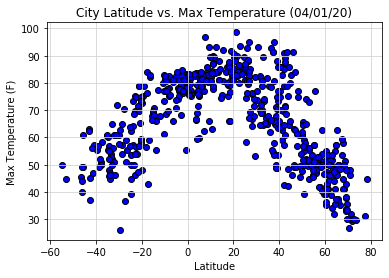

In [41]:
#graph plot of lat vs. temp
plt.scatter(city_df["Lat"],city_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Latitude vs. Humidity Plot

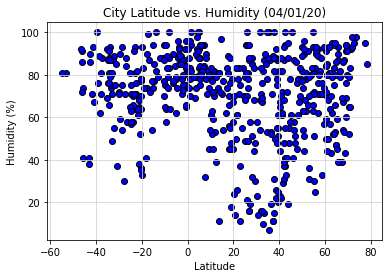

In [42]:
#graph plot of lat vs. Humidity
plt.scatter(city_df["Lat"],city_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Latitude vs. Cloudiness Plot

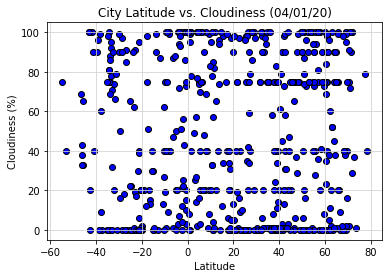

In [43]:
#graph plot of lat vs. Cloudiness
plt.scatter(city_df["Lat"],city_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Latitude vs. Wind Speed Plot

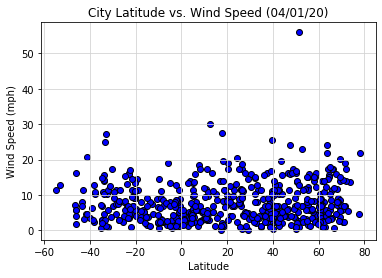

In [44]:
#graph plot of lat vs. Wind Speed Plot
plt.scatter(city_df["Lat"],city_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


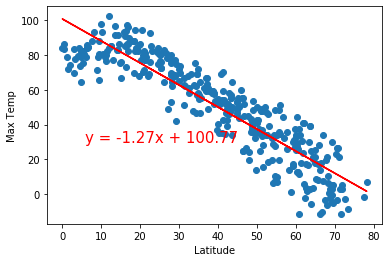

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


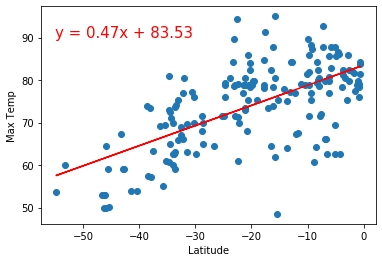

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


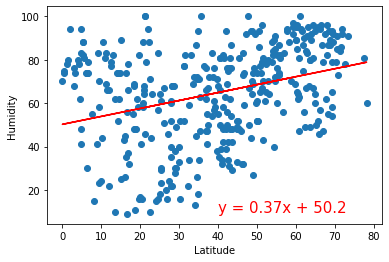

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


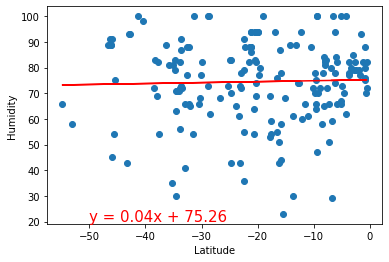

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


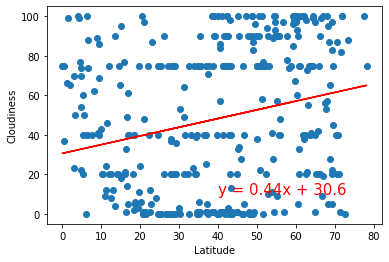

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


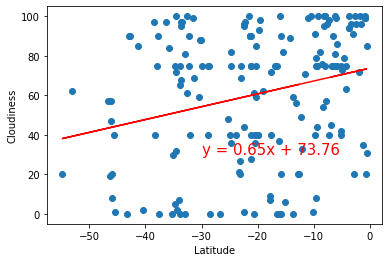

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


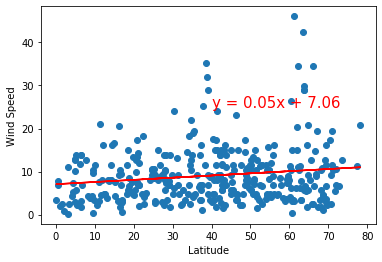

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


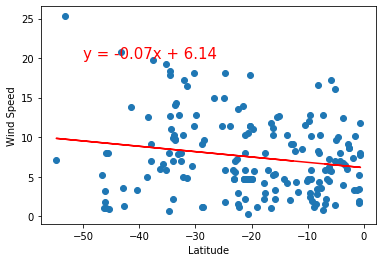